In [64]:
import pandas as pd
import numpy as np
import os 
import re # Regular Expressions library
import matplotlib.pyplot as plt 

folder_path = r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\EMG_data_for_gestures-master\EMG_data_for_gestures-master\01'

all_files = os.listdir(folder_path)
        
new_list = []

for fle in all_files:
   # open the file and then call .read() to get the text
   with open(os.path.join(path, fle),"rb") as f:
      text = f.read()
      new_list.append(text)
    
      
raw_data = pd.read_csv(r"C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\EMG_data_for_gestures-master\EMG_data_for_gestures-master\01\1_raw_data_13-12_22.03.16.txt")
raw_file = open(r"C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\EMG_data_for_gestures-master\EMG_data_for_gestures-master\01\1_raw_data_13-12_22.03.16.txt","r")

data = raw_file.readlines()
data = [col.split('\t') for col in data]
data[1:] # Capture data and dismiss header info

data_df = pd.DataFrame(data)
columns = data[0]
data_df.columns = columns

# Remove "\n" in the final column
def cleaner(txt):
    txt = re.sub(r'[\n]+','', txt)
    return txt

# Apply cleaner function to last column header
data_df = data_df.rename(columns = {'class\n' : 'class'} )

# Apply cleaner function to last column values 
data_df['class'] = data_df['class'].apply(lambda p: cleaner(p))

data_df = data_df.iloc[1:] # Remove first header row
data_df = data_df.astype(str).astype(float)

In [152]:
# Format Data: Split into attrubutes and class labels
X = data_df.iloc[:,:-1]
y = data_df['class']

time = data_df.iloc[:, 0]
channel1 = data_df.iloc[:, 1]
channel2 = data_df.iloc[:,2]
channel3 = data_df.iloc[:, 3]
channel4 = data_df.iloc[:,4]
channel5 = data_df.iloc[:, 5]
channel6 = data_df.iloc[:,6]
channel7 = data_df.iloc[:, 7]
channel8 = data_df.iloc[:,8]
Class = data_df.iloc[:,9]

# Get the index of each attribute with value 
# 0 - unmarked data
# 1 - Hand at rest
# 2 - Hand at clenched fist
# 3 - Wrist flexion
# 4 - Wrist extension
# 5 - Radial deviations
# 6 - Ulnar deviations
# 7 - Extended palm (gesture was not performed by all subjects)

rest_idx = np.where(data_df['class'] == 1)
clenched_idx = np.where(data_df['class'] == 2)
flexion_idx = np.where(data_df['class'] == 3)
extension_idx = np.where(data_df['class'] == 4)
rdev_idx = np.where(data_df['class'] == 5)
udev_idx = np.where(data_df['class'] == 6)
extend_palm_idx = np.where(data_df['class'] == 7)

for i in range(len(rest_idx)):
    Class_rest = Class[rest_idx[i] + 1]
for i in range(len(clenched_idx)):
    Class_clenched = Class[clenched_idx[i] + 1 ]    
for i in range(len(flexion_idx)):
    Class_flexion = Class[flexion_idx[i] + 1]    
for i in range(len(extension_idx)):
    Class_extension = Class[extension_idx[i] +1]      
for i in range(len(rdev_idx)):
    Class_rdev = Class[rdev_idx[i] +1]  
for i in range(len(udev_idx)):
    Class_udev = Class[udev_idx[i] +1]        
for i in range(len(extend_palm_idx)):
    Class_extend_palm = Class[extend_palm_idx[i] + 1] 
X

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
1,1.0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,5.0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
3,6.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,7.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
5,8.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
6,9.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
7,10.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
8,11.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
9,12.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
10,13.0,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


No handles with labels found to put in legend.


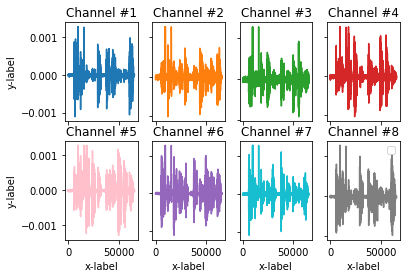

In [182]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].plot(time, channel1)
axs[0, 1].plot(time, channel2, 'tab:orange')
axs[0, 2].plot(time, channel3, 'tab:green')
axs[0, 3].plot(time, channel4, 'tab:red')

axs[1, 0].plot(time, channel5,'pink')
axs[1, 1].plot(time, channel6, 'tab:purple')
axs[1, 2].plot(time, channel7, 'tab:cyan')
axs[1, 3].plot(time, channel8, 'tab:gray')

for i in range(2):
    for j in range(4):
        axs[i, j].set_title('Channel #%s' %str(i*4 + j + 1))

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.legend()

In [183]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = abs(X)
scaler = preprocessing.StandardScaler().fit_transform(X)

X_scaled[:,0]

array([-1.7302066 , -1.72999545, -1.72994266, ...,  1.73575039,
        1.73580318,  1.73585597])

No handles with labels found to put in legend.


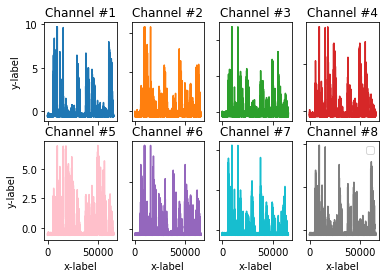

In [184]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].plot(time, X_scaled[:,1])
axs[0, 1].plot(time, X_scaled[:,2], 'tab:orange')
axs[0, 2].plot(time, X_scaled[:,3], 'tab:green')
axs[0, 3].plot(time, X_scaled[:,4], 'tab:red')
axs[1, 0].plot(time, X_scaled[:,5],'pink')
axs[1, 1].plot(time, X_scaled[:,6], 'tab:purple')
axs[1, 2].plot(time, X_scaled[:,7], 'tab:cyan')
axs[1, 3].plot(time, X_scaled[:,8], 'tab:gray')

for i in range(2):
    for j in range(4):
        axs[i, j].set_title('Channel #%s' %str(i*4 + j + 1))
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
   
plt.legend()

In [210]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
lda = LDA(n_components = 1) # number of linear discriminants (n=1 for a single linear discriminant)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Compare LDA to PCA in Random Forest algorithm
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[8186    0    0    0    0    0    0]
 [ 791    0    0    0    0    0    0]
 [ 748    0    0    0    0    0    0]
 [ 726    0    0    0    0    0    0]
 [ 701    0    0    0    0    0    0]
 [ 717    0    0    0    0    0    0]
 [ 771    0    0    0    0    0    0]]
Accuracy: 0.647626582278481


C:\Users\dholl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [225]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate Model
train_scores = cross_val_score(lda, X_train, y_train, scoring = 'accuracy', cv=cv, n_jobs=-1)
test_scores = cross_val_score(lda, X_test, y_test, scoring = 'accuracy', cv=cv, n_jobs=-1)
# Report avg accuracy of three repeats of 10-fold cross-validation
print('Mean Train Accuracy: %.3f (%.3f)' % (mean(train_scores), std(train_scores)))
print('Mean Test Accuracy: %.3f (%.3f)' % (mean(test_scores), std(test_scores)))

Mean Train Accuracy: 0.638 (0.003)
Mean Test Accuracy: 0.630 (0.005)


In [233]:
from numpy import arange
from sklearn.model_selection import GridSearchCV

# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
model = LDA(solver = 'lsqr')
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=1)
# perform the search
train_results = search.fit(X_train, y_train)
print('Mean Train Accuracy: %.3f' % train_results.best_score_)
print('Config %s' % train_results.best_params_)

test_results = search.fit(X_test, y_test)
print('Mean Test Accuracy: %.3f' % test_results.best_score_)
print('Config %s' % test_results.best_params_)

Mean Train Accuracy: 0.638
Config {'shrinkage': 0.0}
Mean Test Accuracy: 0.630
Config {'shrinkage': 0.0}
